In [6]:
from base import np, plt

import importlib
import threeD
importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap3D/"

# Cross-Sectional Flux-Maps

In [7]:
def shell_generator(r0, l):
    'Define the inner step function that takes r as parameter'
    def c_shell(r):
        'Determine the condition based on r0 and l'
        cond = (r >= r0) & (r <= r0 + l)
        c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_shell

common_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Local Boundary
    'L' : 10,
    # Spatial Grid Points
    'nr': 1_000_000,
    #Variable Abs-Diff Ratio
    'T_ratio': (1e-1, 1e2),
    'n_T_ratio' : 250,
}
SOLVE_SYSTEM = False

### Iterate over radii $(\rho)$ \& Abs-Diff Ratio $(\tau_c / \tau_d)$ 📄

Minimum flux: Phi(1.108, 0.100)=0.001
Maximum flux: Phi(10.000, 100.000)=0.983


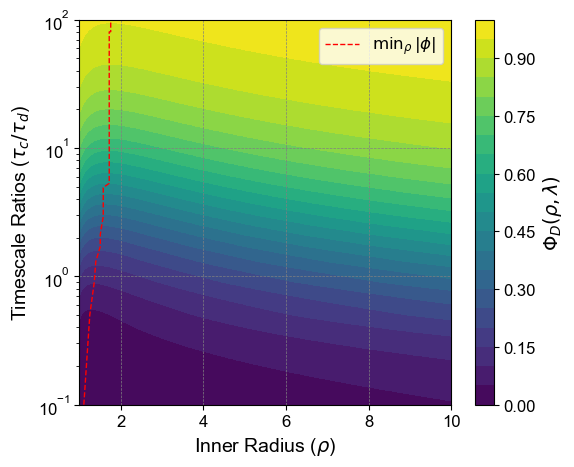

In [8]:
name = 'c_shell(r)_cross_section_lambda=0.5'
params_rho = common_params.copy()
params_rho.update({
    'n_rho': 250,
    'lambda': 0.5 # Constant thickness
})
T_ratio_logscale = True
FM_rho = FluxMap3D(params_rho, shell_generator, set_logscale=T_ratio_logscale)
if SOLVE_SYSTEM:
    FM_rho.solve(n_jobs=-1)
    FM_rho.save_data(name)
else:
    FM_rho.load_data(name)
FM_rho.plot(set_extremes=False, set_transition=True, set_ylog=T_ratio_logscale)
FM_rho.save(figures_path, name)

In [10]:
a,b = FM_rho.alpha
print(f'alpha ranges from {a:.0f} to {b:.4f}')
print(f'Average min_rho flux: {np.mean(FM_rho.r0_transect):.4f}')

alpha ranges from 2513 to 2.5133
Average min_rho flux: 1.7170


#### Smoothness of the Concentration Profile

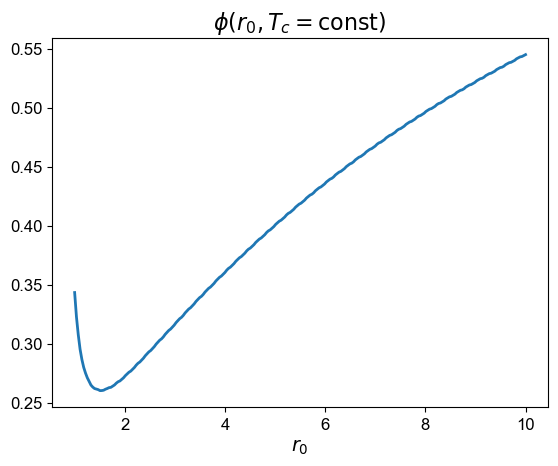

In [ ]:
plt.plot(FM_rho.x_values, FM_rho.flux_map[:,5])
plt.xlabel('$r_0$')
plt.title('$\\phi(r_0, T_c=\\text{const})$');

### Iterate over thicknesses $(\lambda)$ \& Abs-Diff Ratio $(\tau_c / \tau_d)$ 📄

In [11]:
name = 'c_shell(r)_cross_section_rho=1'
params_l = common_params.copy()
params_l.update({
    'n_lambda': 250,
    'rho': 1 # Constant radius
})
T_ratio_logscale = True
FM_l = FluxMap3D(params_l, shell_generator, set_logscale=T_ratio_logscale)
if SOLVE_SYSTEM:
    FM_l.solve(n_jobs=2) # -1 !!!
    FM_l.save_data(name)
else:
    FM_l.load_data(name)
# FM_l.plot(set_extremes=False, set_transition=False, set_xlog=T_ratio_logscale)
# FM_l.save(figures_path, name)

First, we need to find the minimum flux $\phi$ for each $T_c$:
$$m_{\phi} (T_c) = \min_{\lambda} \phi(T_c, \lambda)$$

This corresponds to the minimum flux for each row from the flux map $\phi$.

$$\phi(T_c, \lambda) \approx \phi[i_{T_c}, j_{\lambda}]$$

Minimum flux: Phi(0.100, 1.728)=0.000
Maximum flux: Phi(100.000, 0.036)=0.996


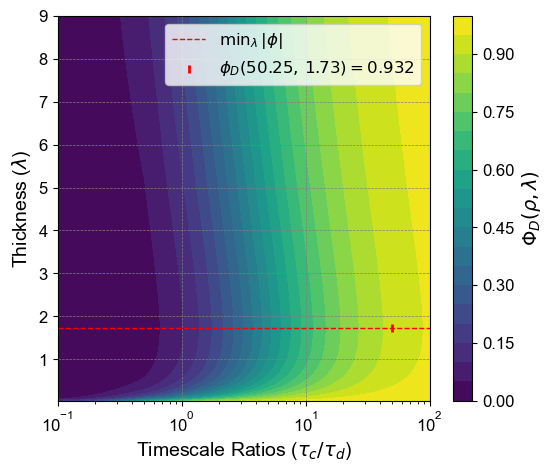

In [13]:
# Get the flux map
φ = FM_l.flux_map

# Find the positions where these minima occur
minl_indices = [np.argmin(φj) for φj in φ]
# Get the corresponding r0 values for the maximum flux
l_transect = [FM_l.y_values[i] for i in minl_indices]

# Plot the flux map
FM_l.plot(set_extremes=False, set_transition=False, set_xlog=T_ratio_logscale)

# Add the maximum flux line connecting the maxima
FM_l.ax.plot(FM_l.x_values, l_transect, 'r--', label='$\\text{min}_{\\lambda} \\, |\\phi|$', linewidth=1)

Tc_p = FM_l.x_values[params_l['n_T_ratio']//2]
l_p = l_transect[params_l['n_lambda']//2]
φ_p  = φ[params_l['n_T_ratio']//2, params_l['n_lambda']//2]

label = f'$\\phi_D({Tc_p:.2f},\\,{l_p:.2f})= {φ_p:.3f}$'
FM_l.ax.scatter(Tc_p, l_p, marker='|', color='red', label=label)
FM_l.ax.legend()
FM_l.save(figures_path, name)

[\href{https://github.com/GeorchPz/bacterial_chemotaxis_effect_on_chemoattractor_cell/blob/main/3D-3%2B_cross_sections.ipynb}{Notebook}]

#### Smoothness of the Concentration Profile

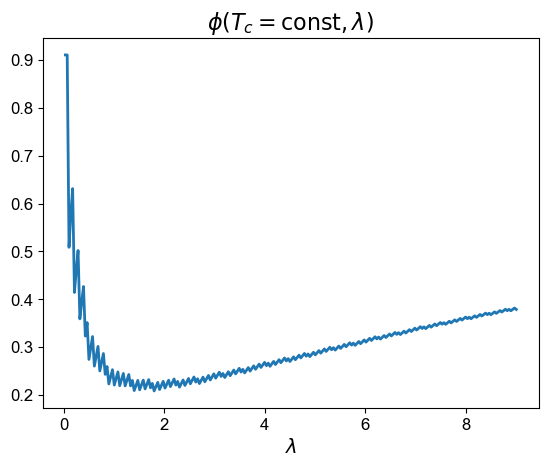

In [ ]:
plt.plot(FM_l.y_values, FM_l.flux_map[5,:])
plt.xlabel('$\\lambda$')
plt.title('$\\phi(T_c=\\text{const}, \\lambda)$');

### Check if $ \phi_a / \phi_b \Big|_{(r0,\lambda)} = $ const

We will asume that the flux's dependence on the absorption rate can be separated from the dependence on the concentration profile. This means that we can write:
$$
\phi(T_c, r_0, \lambda) = \varphi(T_c) \cdot \psi(r_0, \lambda)$$
$$

In [ ]:
# syst_params = {
#     # Space Boundaries
#     'R_dtm' : 1, 'R_inf' : 1000,
#     # Max Bacterial Boundary
#     'L' : 10,
#     'Tc': None,
#     # Number of points
#     'nr': 100_000, # Weird triangles appear if it's too low
#     'n_rho': 250,'n_l': 250
# }

We create two fluxes for different absorption rates $a$ and $b$, but same concentration profile:
$$
\phi_a(T_c, r_0, \lambda) = \varphi_a(T_c) \cdot \psi(r_0, \lambda)
$$
$$
\phi_b(T_c, r_0, \lambda) = \varphi_b(T_c) \cdot \psi(r_0, \lambda)
$$
We can then write the ratio of the two fluxes as:
$$
\frac{\phi_a(T_c, r_0, \lambda)}{\phi_b(T_c, r_0, \lambda)} = \frac{\varphi_a(T_c)}{\varphi_b(T_c)}
$$
Removing the dependence on the concentration profile variables $r_0$ and $\lambda$. We should therefore expect that the ratio of the two fluxes is constant for all $r_0$ and $\lambda$.

In [ ]:
syst_params['Tc'] = 1e-2

FM_a = FluxMap3D(syst_params, shell_generator)
FM_a.solve(n_jobs=-1)
phi_a = FM_a.flux_map

ODEs solved:  70%|██████▉   | 21776/31126 [00:50<00:22, 423.84it/s]c:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
ODEs solved: 100%|██████████| 31126/31126 [01:24<00:00, 369.99it/s]


In [ ]:
syst_params['Tc'] = 1

FM_b = FluxMap3D(syst_params, shell_generator)
FM_b.solve(n_jobs=-1)
phi_b = FM_b.flux_map

ODEs solved: 100%|██████████| 31126/31126 [02:22<00:00, 218.14it/s]


We remove the null-space of the flux-maps since they do not give us any information about the concentration profile and therefore we are able to divide two fluxes.

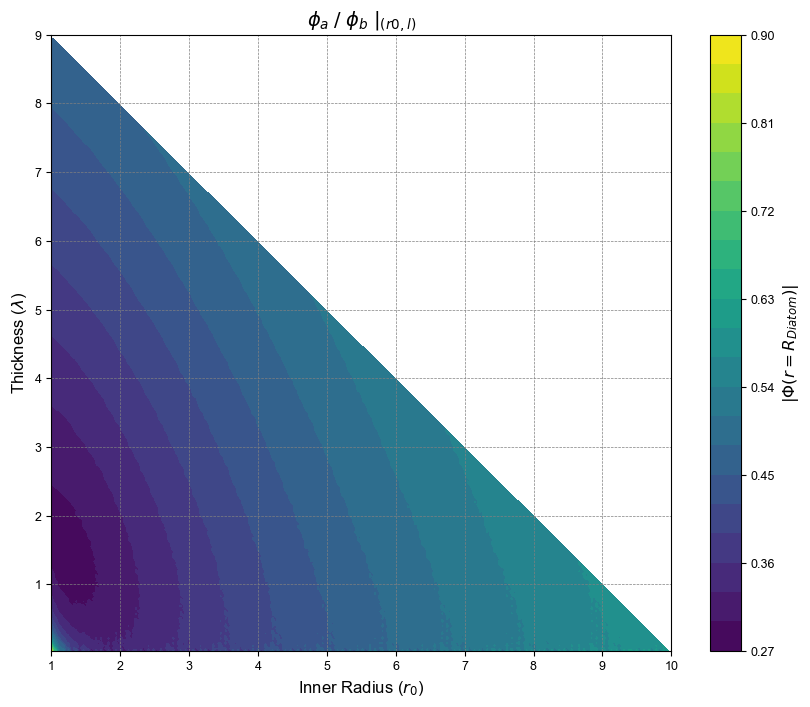

In [ ]:
phi_a[phi_a == 0] = np.nan
phi_b[phi_b == 0] = np.nan

FM = FluxMap3D(syst_params, None)
FM.title = '$\\phi_a \; / \; \\phi_b \; \Big|_{(r0,\lambda)}$'
FM.flux_map = phi_a / phi_b

FM.plot()

Therefore, by reduction to absurdity, we can conclude that the fluxes dependence over the absorption rate is not separable from the concentration profile.
$$\phi(T_c, r_0, \lambda) \neq \varphi(T_c)\cdot\psi(r_0, \lambda)$$